**ANALYSIS TO FIND CORRELATION BETWEEN 
NIKE REVENUE AND SOCIAL DATA** 

Stages of the problem:


1.  DATA CLEANING
2.  EXPLORATORY DATA ANALYSIS
3.  RESULTS AND EVALUATION




In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/nike_ua_project/nike/nike_fb.csv')
df_ig = pd.read_csv('/content/drive/MyDrive/nike_ua_project/nike/nike_ig.csv')
df_yt = pd.read_csv('/content/drive/MyDrive/nike_ua_project/nike/nike_yt.csv')
df_twt = pd.read_csv('/content/drive/MyDrive/nike_ua_project/nike/nike_tw.csv')

# DATA CLEANING AND PREPARING

The date in social data is not a quarterly date and the revenue data contains date in quarterly format. Hence, created a function to convert the daily date format into quarterly.

In [6]:
def get_quart(d):
    sr='no'
    mnt = {1:'Mar-31', 2:'Jun-30', 3:'Sep-30', 4:'Dec-31'}
    sr ='Q'+str(d.quarter)+'\n'+mnt[d.quarter]+'-'+str(d.year)
    return sr 


df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d")
df["Quarter"] = df['date'].apply(lambda x: get_quart(x))

df_ig['date'] = pd.to_datetime(df_ig['date'], format="%Y-%m-%d")
df_ig["Quarter"] = df_ig['date'].apply(lambda x: get_quart(x))

df_yt['date'] = pd.to_datetime(df_yt['date'], format="%Y-%m-%d")
df_yt["Quarter"] = df_yt['date'].apply(lambda x: get_quart(x))

df_twt['date'] = pd.to_datetime(df_twt['date'], format="%Y-%m-%d")
df_twt["Quarter"] = df_twt['date'].apply(lambda x: get_quart(x))

In [ ]:
df.head(5)

In [ ]:
df_ig.head(5)

In [ ]:
df_yt.head(5)

In [ ]:
df_twt.head(5)

In [ ]:
df_sales = pd.read_csv('/content/drive/MyDrive/nike_ua_project/sales-data/quarterly_sales_nike_13-18.csv')
df_sales.columns = ['Quarter','Total_Revenue_MM']
df_sales

Merging the social data dataframe and revenue dataframe on Quarter column. 

In [ ]:
nike_df = pd.merge(df, df_sales, how='inner', left_on='Quarter', right_on='Quarter')
nike_df_ig = pd.merge(df_ig, df_sales, how='inner', left_on='Quarter', right_on='Quarter')
nike_df_yt = pd.merge(df_yt, df_sales, how='inner', left_on='Quarter', right_on='Quarter')
nike_df_twt = pd.merge(df_twt, df_sales, how='inner', left_on='Quarter', right_on='Quarter')
nike_df.head(5)

### Checking Null Percentage value in each attribute

In [ ]:
nike_fb = pd.DataFrame(nike_df.isna().sum()/nike_df.shape[0])
nike_ig =pd.DataFrame(nike_df_ig.isna().sum()/nike_df.shape[0])
nike_yt = pd.DataFrame(nike_df_yt.isna().sum()/nike_df.shape[0])
nike_twt = pd.DataFrame(nike_df_twt.isna().sum()/nike_df.shape[0])

pd.set_option('display.max_rows',None)
nike_fb

In [ ]:
nike_fb.rename(columns = {0:'Null_Percentage'},inplace = True)
nike_ig.rename(columns = {0:'Null_Percentage'},inplace = True)
nike_yt.rename(columns = {0:'Null_Percentage'},inplace = True)
nike_twt.rename(columns = {0:'Null_Percentage'},inplace = True)

nike_fb['Column_Name'] = nike_fb.index
nike_ig['Column_Name'] = nike_ig.index
nike_yt['Column_Name'] = nike_yt.index
nike_twt['Column_Name'] = nike_twt.index

nike_fb.reset_index(inplace = True, drop = True)
nike_ig.reset_index(inplace = True, drop = True)
nike_yt.reset_index(inplace = True, drop = True)
nike_twt.reset_index(inplace = True, drop = True)

nike_fb

In [ ]:
nike_ig

In [ ]:
nike_yt

In [ ]:
nike_twt

Create a function to remove null values from all of the dataframes

In [22]:
def remove_null(threshold,df):
    llist = []
    for i in range(df.shape[0]):
        if df.loc[i,'Null_Percentage'] < threshold:
            llist.append(df.loc[i,'Column_Name'])
    return llist

In [23]:
n_fb_Columns = remove_null(0.2,nike_fb)
n_ig_Columns = remove_null(0.2,nike_ig)
n_yt_Columns = remove_null(0.2,nike_yt)
n_twt_Columns = remove_null(0.2,nike_twt)

In [ ]:
nike_df = nike_df[n_fb_Columns]
nike_df_ig = nike_df_ig[n_ig_Columns]
nike_df_yt = nike_df_yt[n_yt_Columns]
nike_df_twt = nike_df_twt[n_twt_Columns]
nike_df

In [ ]:
nike_df_ig

In [30]:
nike_df.index = nike_df['date']
nike_df1 = nike_df.copy()
nike_df1.drop(columns=['date','FIGI','ID','label','Is Rollup','Quarter'],inplace = True)

nike_df_ig.index = nike_df_ig['date']
nike_df_ig1 = nike_df_ig.copy()
nike_df_ig1.drop(columns=['date','FIGI','ID','label','Is Rollup','Quarter'],inplace = True)

nike_df_yt.index = nike_df_yt['date']
nike_df_yt1 = nike_df_yt.copy()
nike_df_yt1.drop(columns=['date','FIGI','ID','label','Is Rollup','Quarter'],inplace = True)

nike_df_twt.index = nike_df_twt['date']
nike_df_twt1 = nike_df_twt.copy()
nike_df_twt1.drop(columns=['date','FIGI','ID','label','Is Rollup','Quarter'],inplace = True)

# EXPLORATORY DATA ANALYSIS

In [32]:
#This dataframe is of Object datatype with the output in the form of a string. We need to remove the ',' and then convert the string into a float format to be able to plot the data.
nike_df1['Total_Revenue_MM'][0]

'6,971.00'

In [ ]:
# nike_df1['Total_Revenue_MM']= nike_df1['Total_Revenue_MM'].str.replace(',','')
# nike_df1['Total_Revenue_MM'] = nike_df1['Total_Revenue_MM'].astype('float')
print(nike_df1['Total_Revenue_MM'].dtypes)

# nike_df_ig1['Total_Revenue_MM']= nike_df_ig1['Total_Revenue_MM'].str.replace(',','')
# nike_df_ig1['Total_Revenue_MM'] = nike_df_ig1['Total_Revenue_MM'].astype('float')
print(nike_df_ig1['Total_Revenue_MM'].dtypes)

# nike_df_yt1['Total_Revenue_MM']= nike_df_yt1['Total_Revenue_MM'].str.replace(',','')
# nike_df_yt1['Total_Revenue_MM'] = nike_df_yt1['Total_Revenue_MM'].astype('float')
print(nike_df_yt1['Total_Revenue_MM'].dtypes)

nike_df_twt1['Total_Revenue_MM']= nike_df_twt1['Total_Revenue_MM'].str.replace(',','')
nike_df_twt1['Total_Revenue_MM'] = nike_df_twt1['Total_Revenue_MM'].astype('float')
print(nike_df_twt1['Total_Revenue_MM'].dtypes)

Checking whether a monotonic association exists before running Spearman Corelation test

In [ ]:
for i in range(0,len(nike_df1.columns),4):
    sns.pairplot(nike_df1,y_vars=['Total_Revenue_MM'],x_vars = nike_df1.columns[i:i+4])

In [ ]:
for i in range(0,len(nike_df_ig1.columns),4):
    sns.pairplot(nike_df_ig1,y_vars=['Total_Revenue_MM'],x_vars = nike_df_ig1.columns[i:i+4])

In [ ]:
for i in range(0,len(nike_df_yt1.columns),4):
    sns.pairplot(nike_df_yt1,y_vars=['Total_Revenue_MM'],x_vars = nike_df_yt1.columns[i:i+4])

In [ ]:
for i in range(0,len(nike_df_twt1.columns),4):
    sns.pairplot(nike_df_twt1,y_vars=['Total_Revenue_MM'],x_vars = nike_df_twt1.columns[i:i+4])

Since the attributes are monotinically correlated, we check which attributes are highly correlated using .corr() 

In [ ]:
nike_df1.corr()['Total_Revenue_MM']

Plotting the results to better understand the **results**

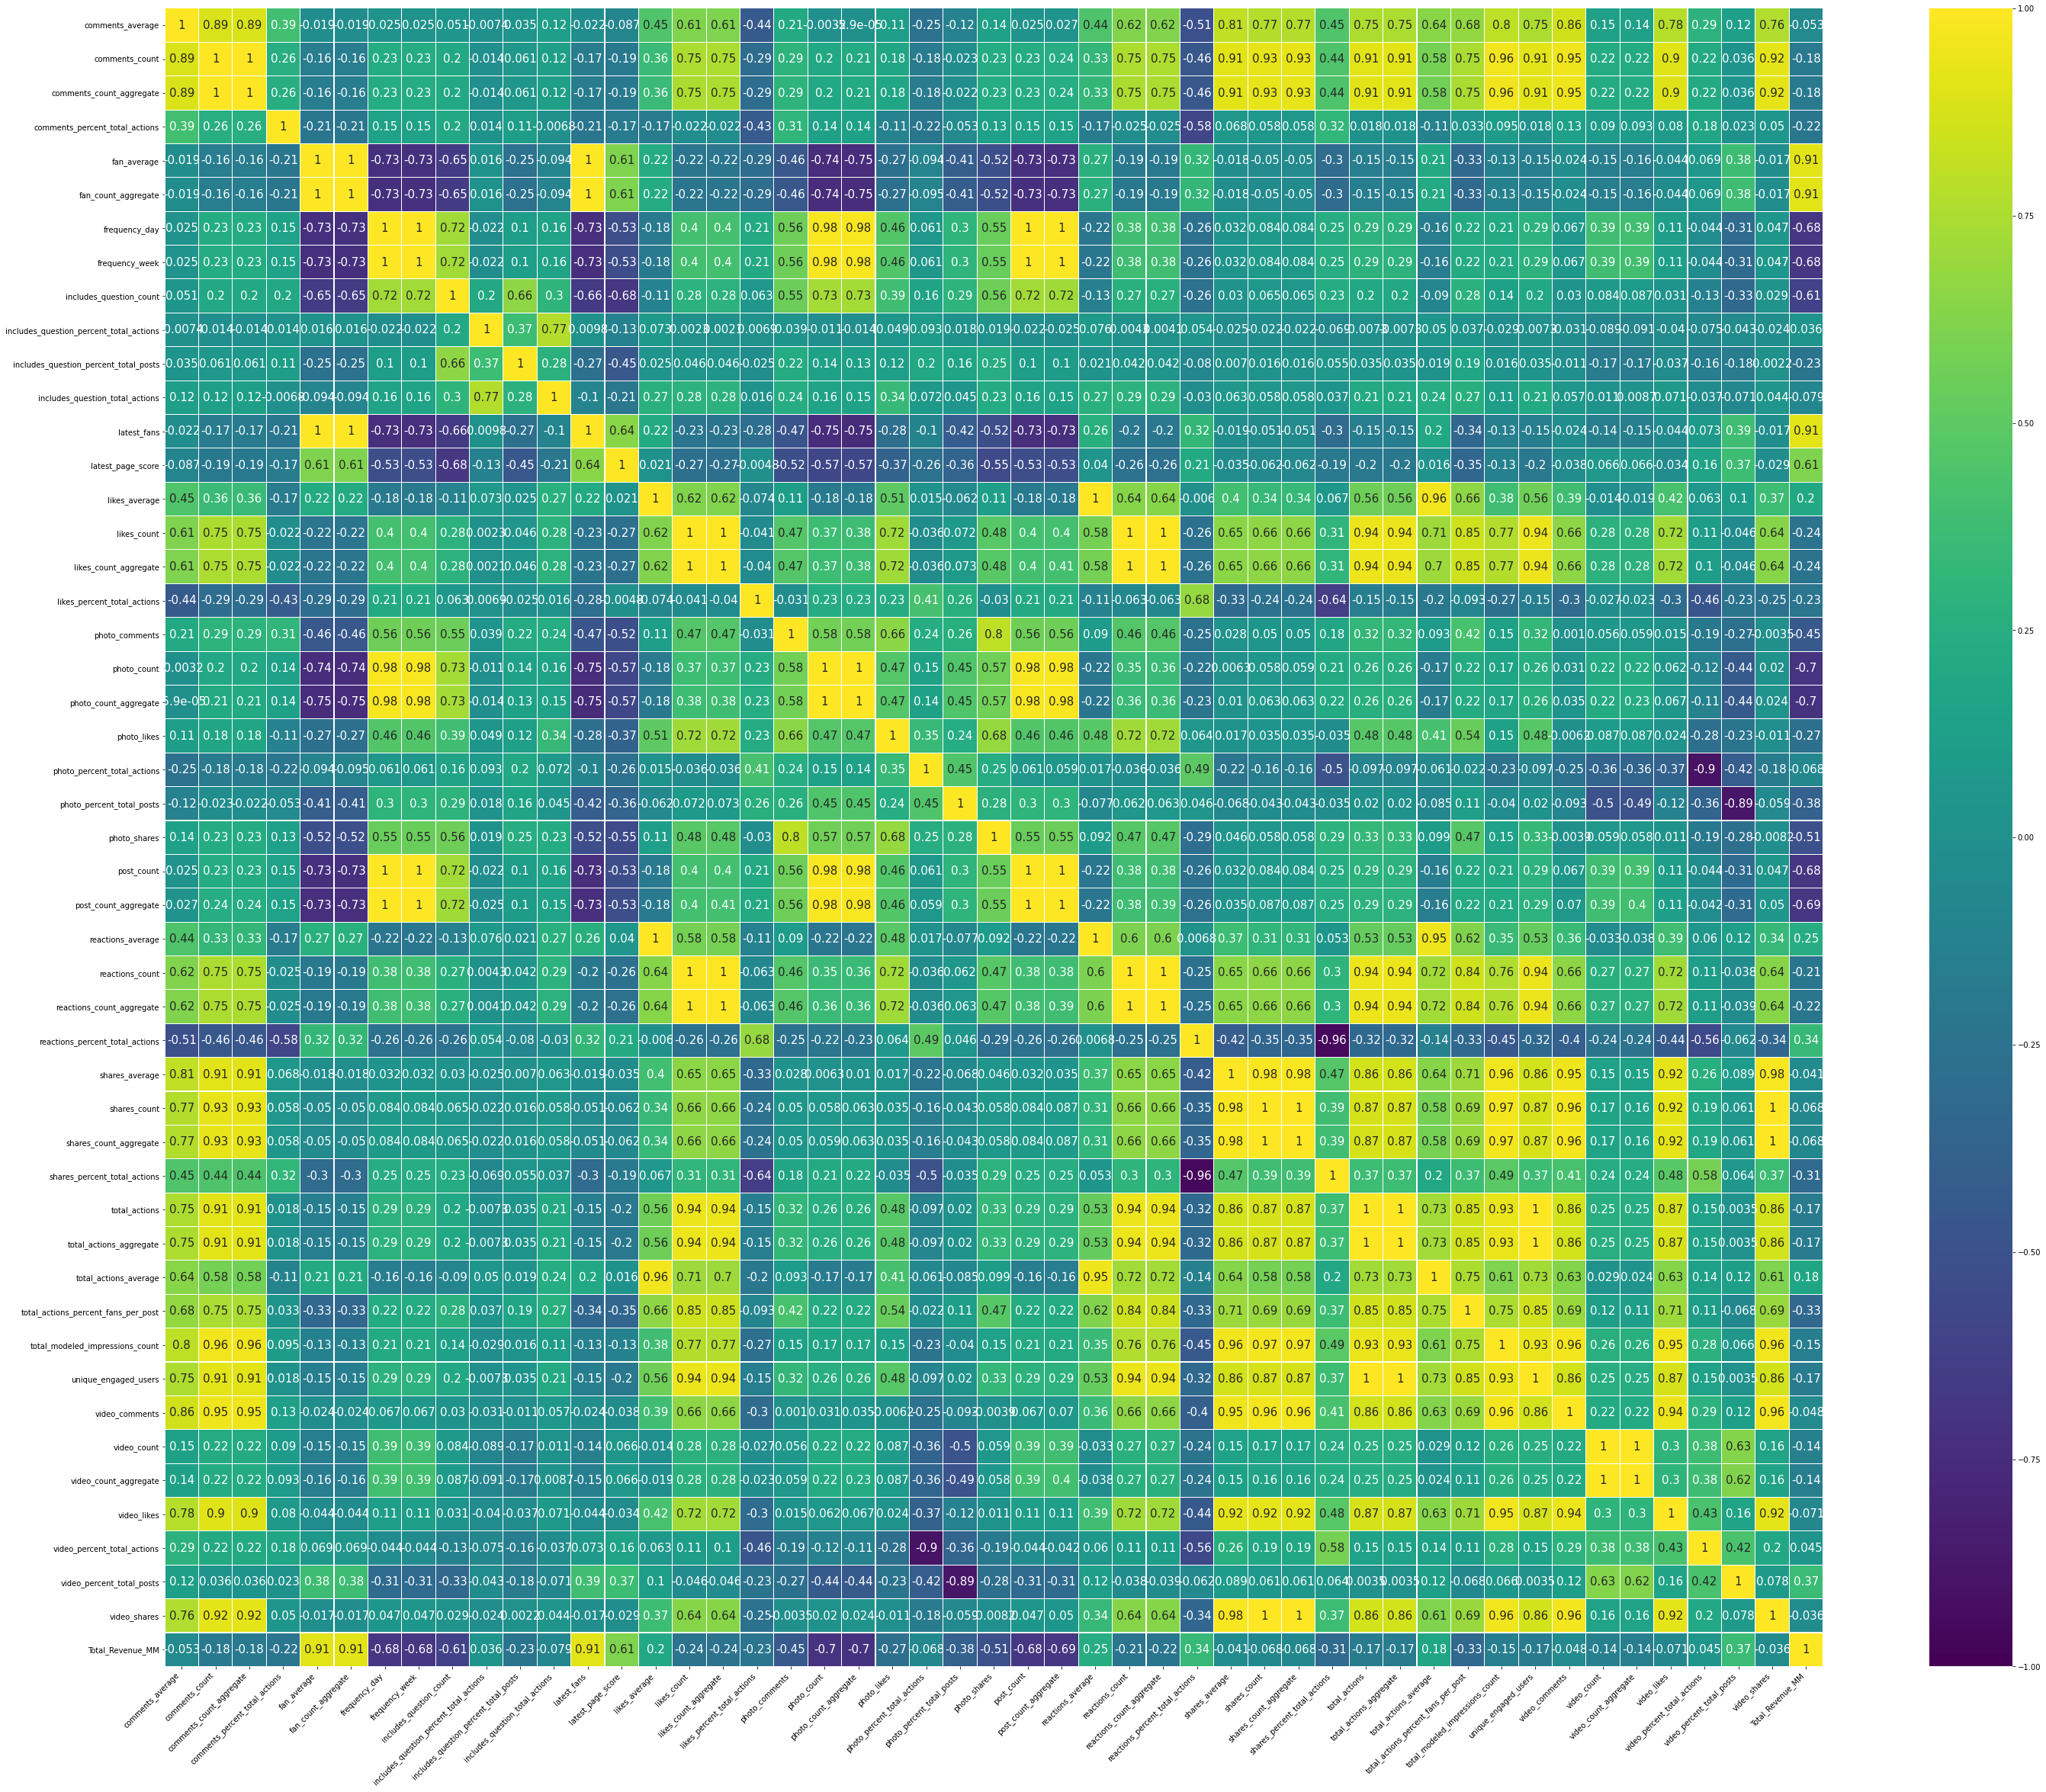

In [ ]:
f, ax = plt.subplots(figsize=(50,40))

ax = sns.heatmap(
    nike_df1.corr(), 
    vmin=-1, vmax=1,center = 0, cmap = 'viridis',
    linewidths=0.1,annot = True, annot_kws={"size":15},
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right');


[Text(0.5, 0, 'comments_average'),
 Text(1.5, 0, 'comments_count'),
 Text(2.5, 0, 'comments_count_aggregate'),
 Text(3.5, 0, 'comments_percent_total_actions'),
 Text(4.5, 0, 'follower_average'),
 Text(5.5, 0, 'follower_count_aggregate'),
 Text(6.5, 0, 'image_count'),
 Text(7.5, 0, 'image_count_aggregate'),
 Text(8.5, 0, 'image_percent_total_actions'),
 Text(9.5, 0, 'image_percent_total_media'),
 Text(10.5, 0, 'image_total_actions'),
 Text(11.5, 0, 'includes_hashtag_count'),
 Text(12.5, 0, 'includes_hashtag_percent_total_actions'),
 Text(13.5, 0, 'includes_hashtag_percent_total_media'),
 Text(14.5, 0, 'includes_hashtag_total_actions'),
 Text(15.5, 0, 'likes_average'),
 Text(16.5, 0, 'likes_count'),
 Text(17.5, 0, 'likes_count_aggregate'),
 Text(18.5, 0, 'likes_percent_total_actions'),
 Text(19.5, 0, 'media_count'),
 Text(20.5, 0, 'media_count_aggregate'),
 Text(21.5, 0, 'total_actions'),
 Text(22.5, 0, 'total_actions_aggregate'),
 Text(23.5, 0, 'total_actions_average'),
 Text(24.5, 0, '

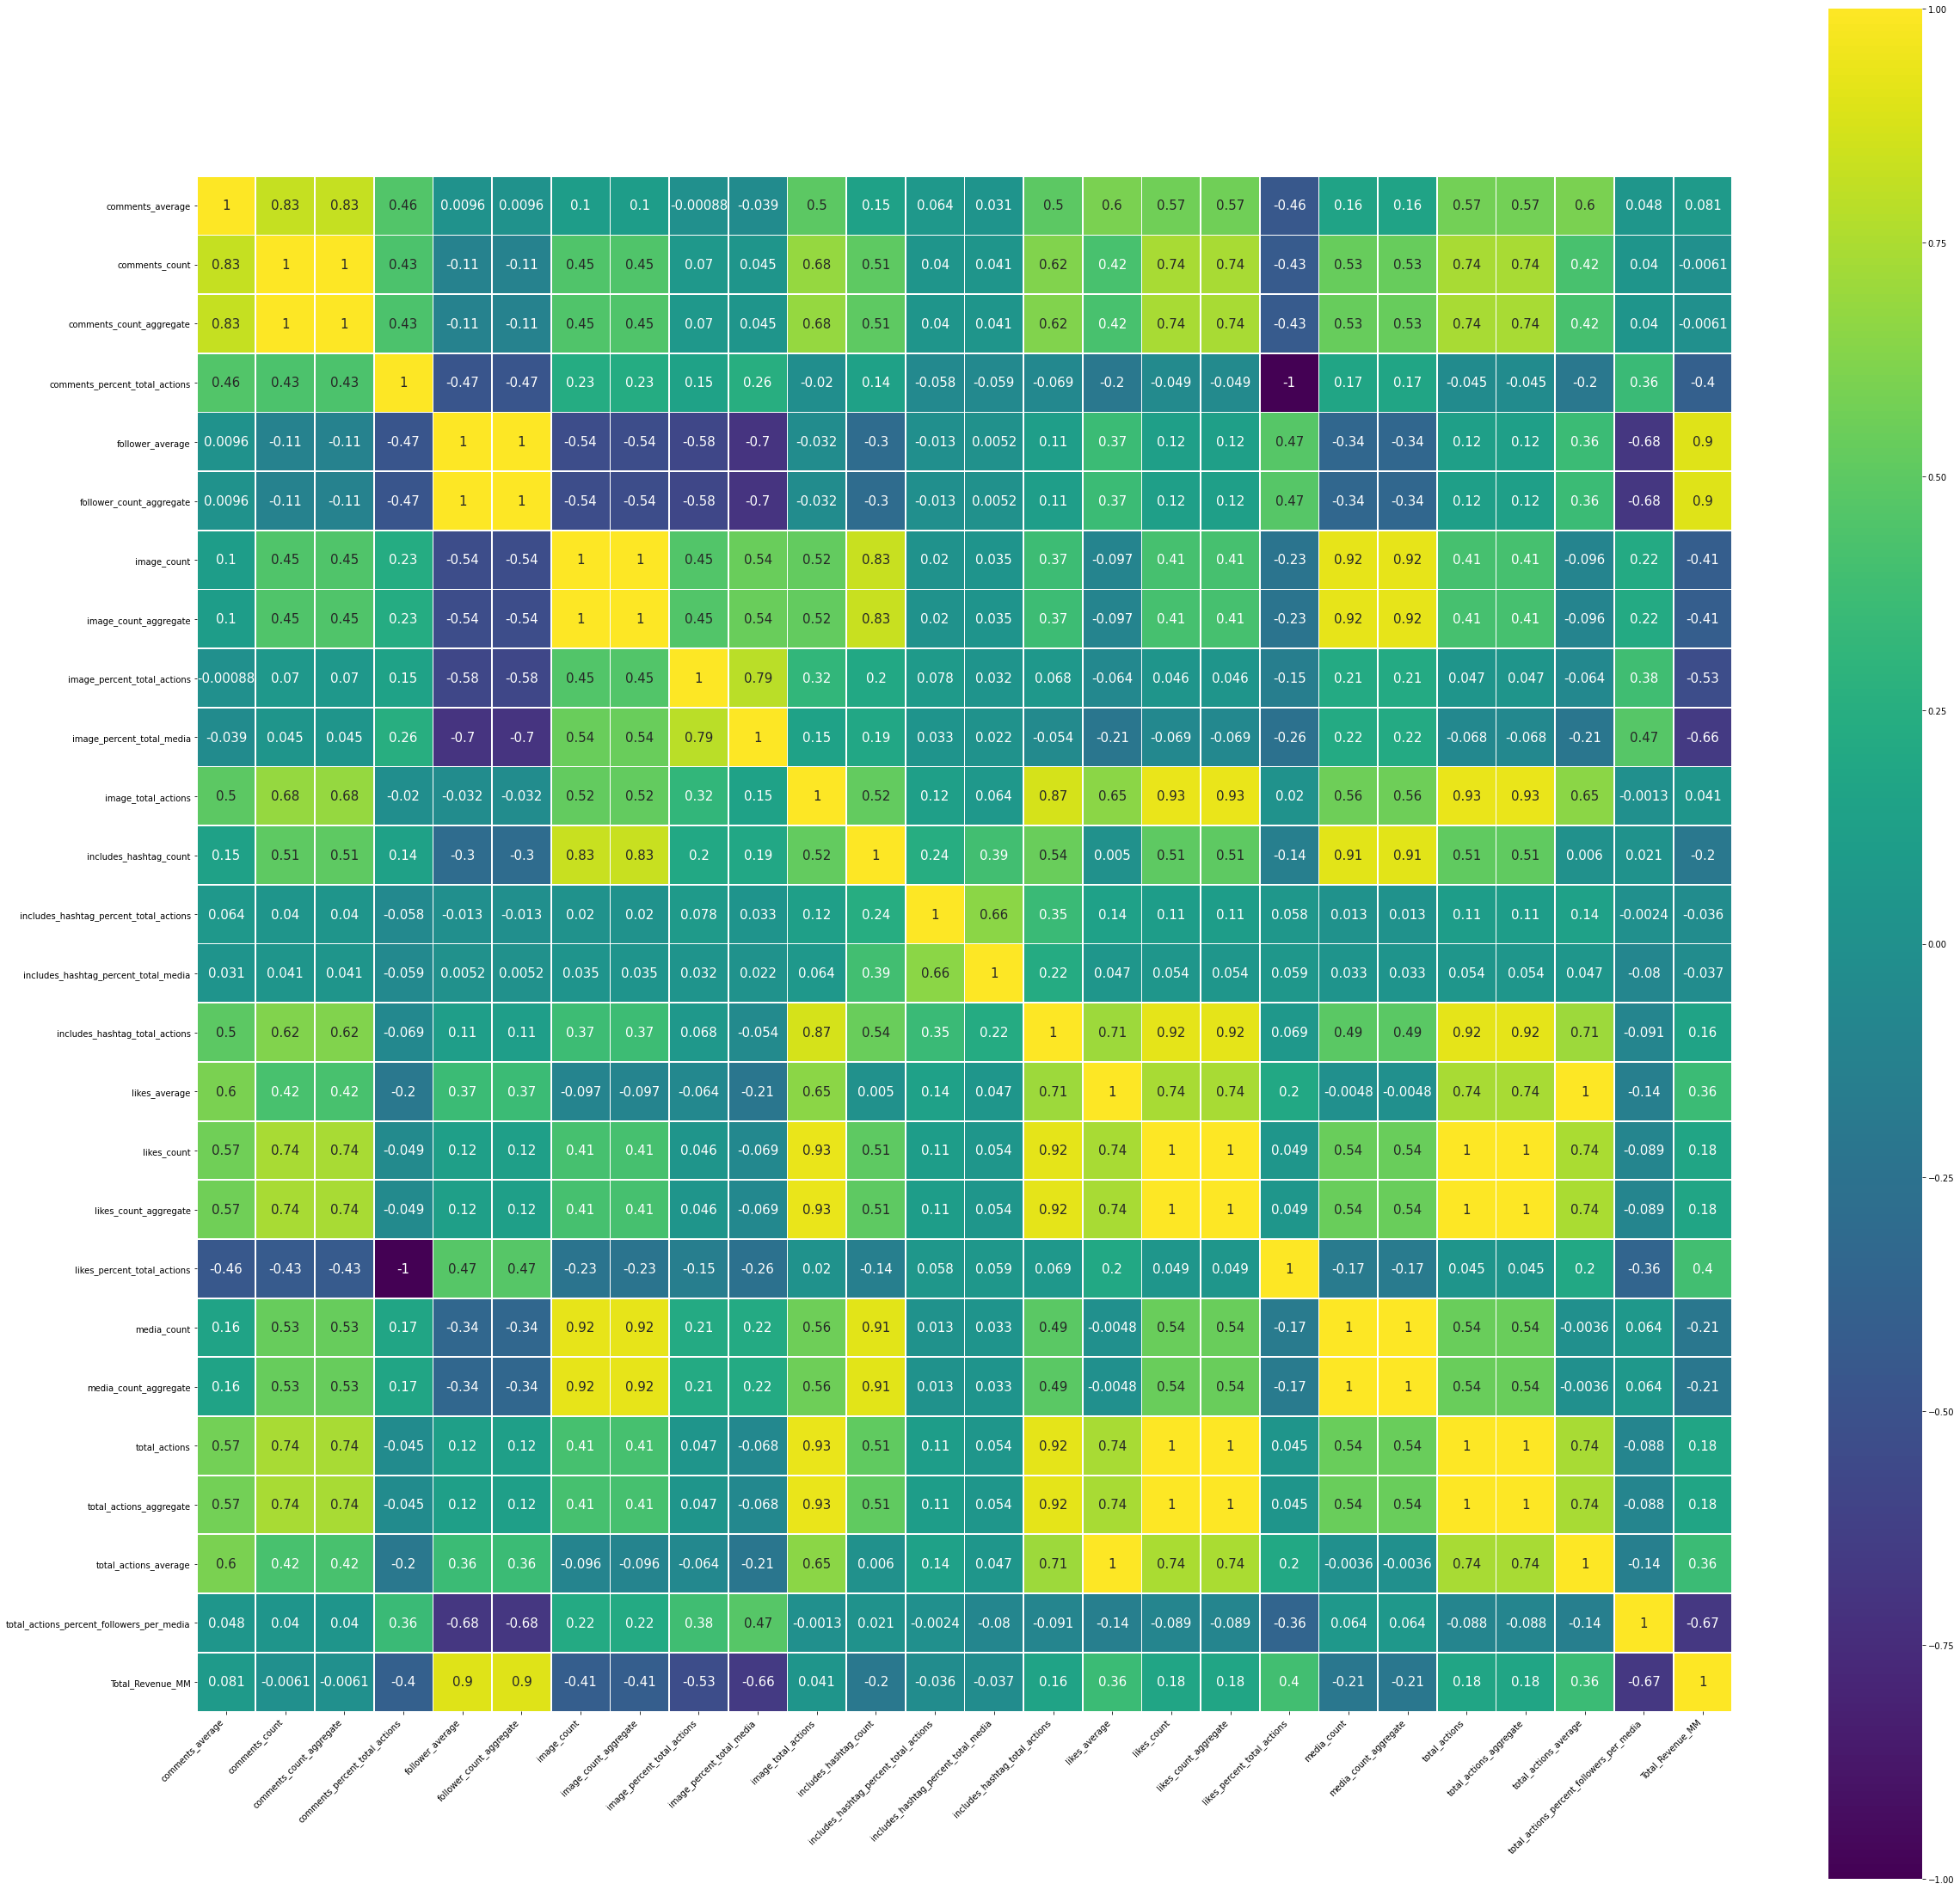

In [ ]:
f_ig, ax_ig = plt.subplots(figsize=(40, 40))
ax_ig = sns.heatmap(
    nike_df1_ig.corr(), 
    vmin=-1, vmax=1,linewidths=0.8,center=0,cmap = 'viridis',
    annot = True, annot_kws={"size":15},
    square=True
)
ax_ig.set_xticklabels(
    ax_ig.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')

[Text(0.5, 0, 'favorites_average'),
 Text(1.5, 0, 'favorites_count'),
 Text(2.5, 0, 'favorites_count_aggregate'),
 Text(3.5, 0, 'favorites_percent_total_actions'),
 Text(4.5, 0, 'followers_average'),
 Text(5.5, 0, 'followers_count'),
 Text(6.5, 0, 'followers_count_aggregate'),
 Text(7.5, 0, 'includes_hashtag_count'),
 Text(8.5, 0, 'includes_hashtag_percent_total_actions'),
 Text(9.5, 0, 'includes_hashtag_percent_total_tweets'),
 Text(10.5, 0, 'includes_hashtag_total_actions'),
 Text(11.5, 0, 'includes_link_count'),
 Text(12.5, 0, 'includes_link_percent_total_actions'),
 Text(13.5, 0, 'includes_link_percent_total_tweets'),
 Text(14.5, 0, 'includes_link_total_actions'),
 Text(15.5, 0, 'includes_photo_count'),
 Text(16.5, 0, 'includes_photo_percent_total_actions'),
 Text(17.5, 0, 'includes_photo_percent_total_tweets'),
 Text(18.5, 0, 'includes_photo_total_actions'),
 Text(19.5, 0, 'retweets_average'),
 Text(20.5, 0, 'retweets_count'),
 Text(21.5, 0, 'retweets_count_aggregate'),
 Text(22.5

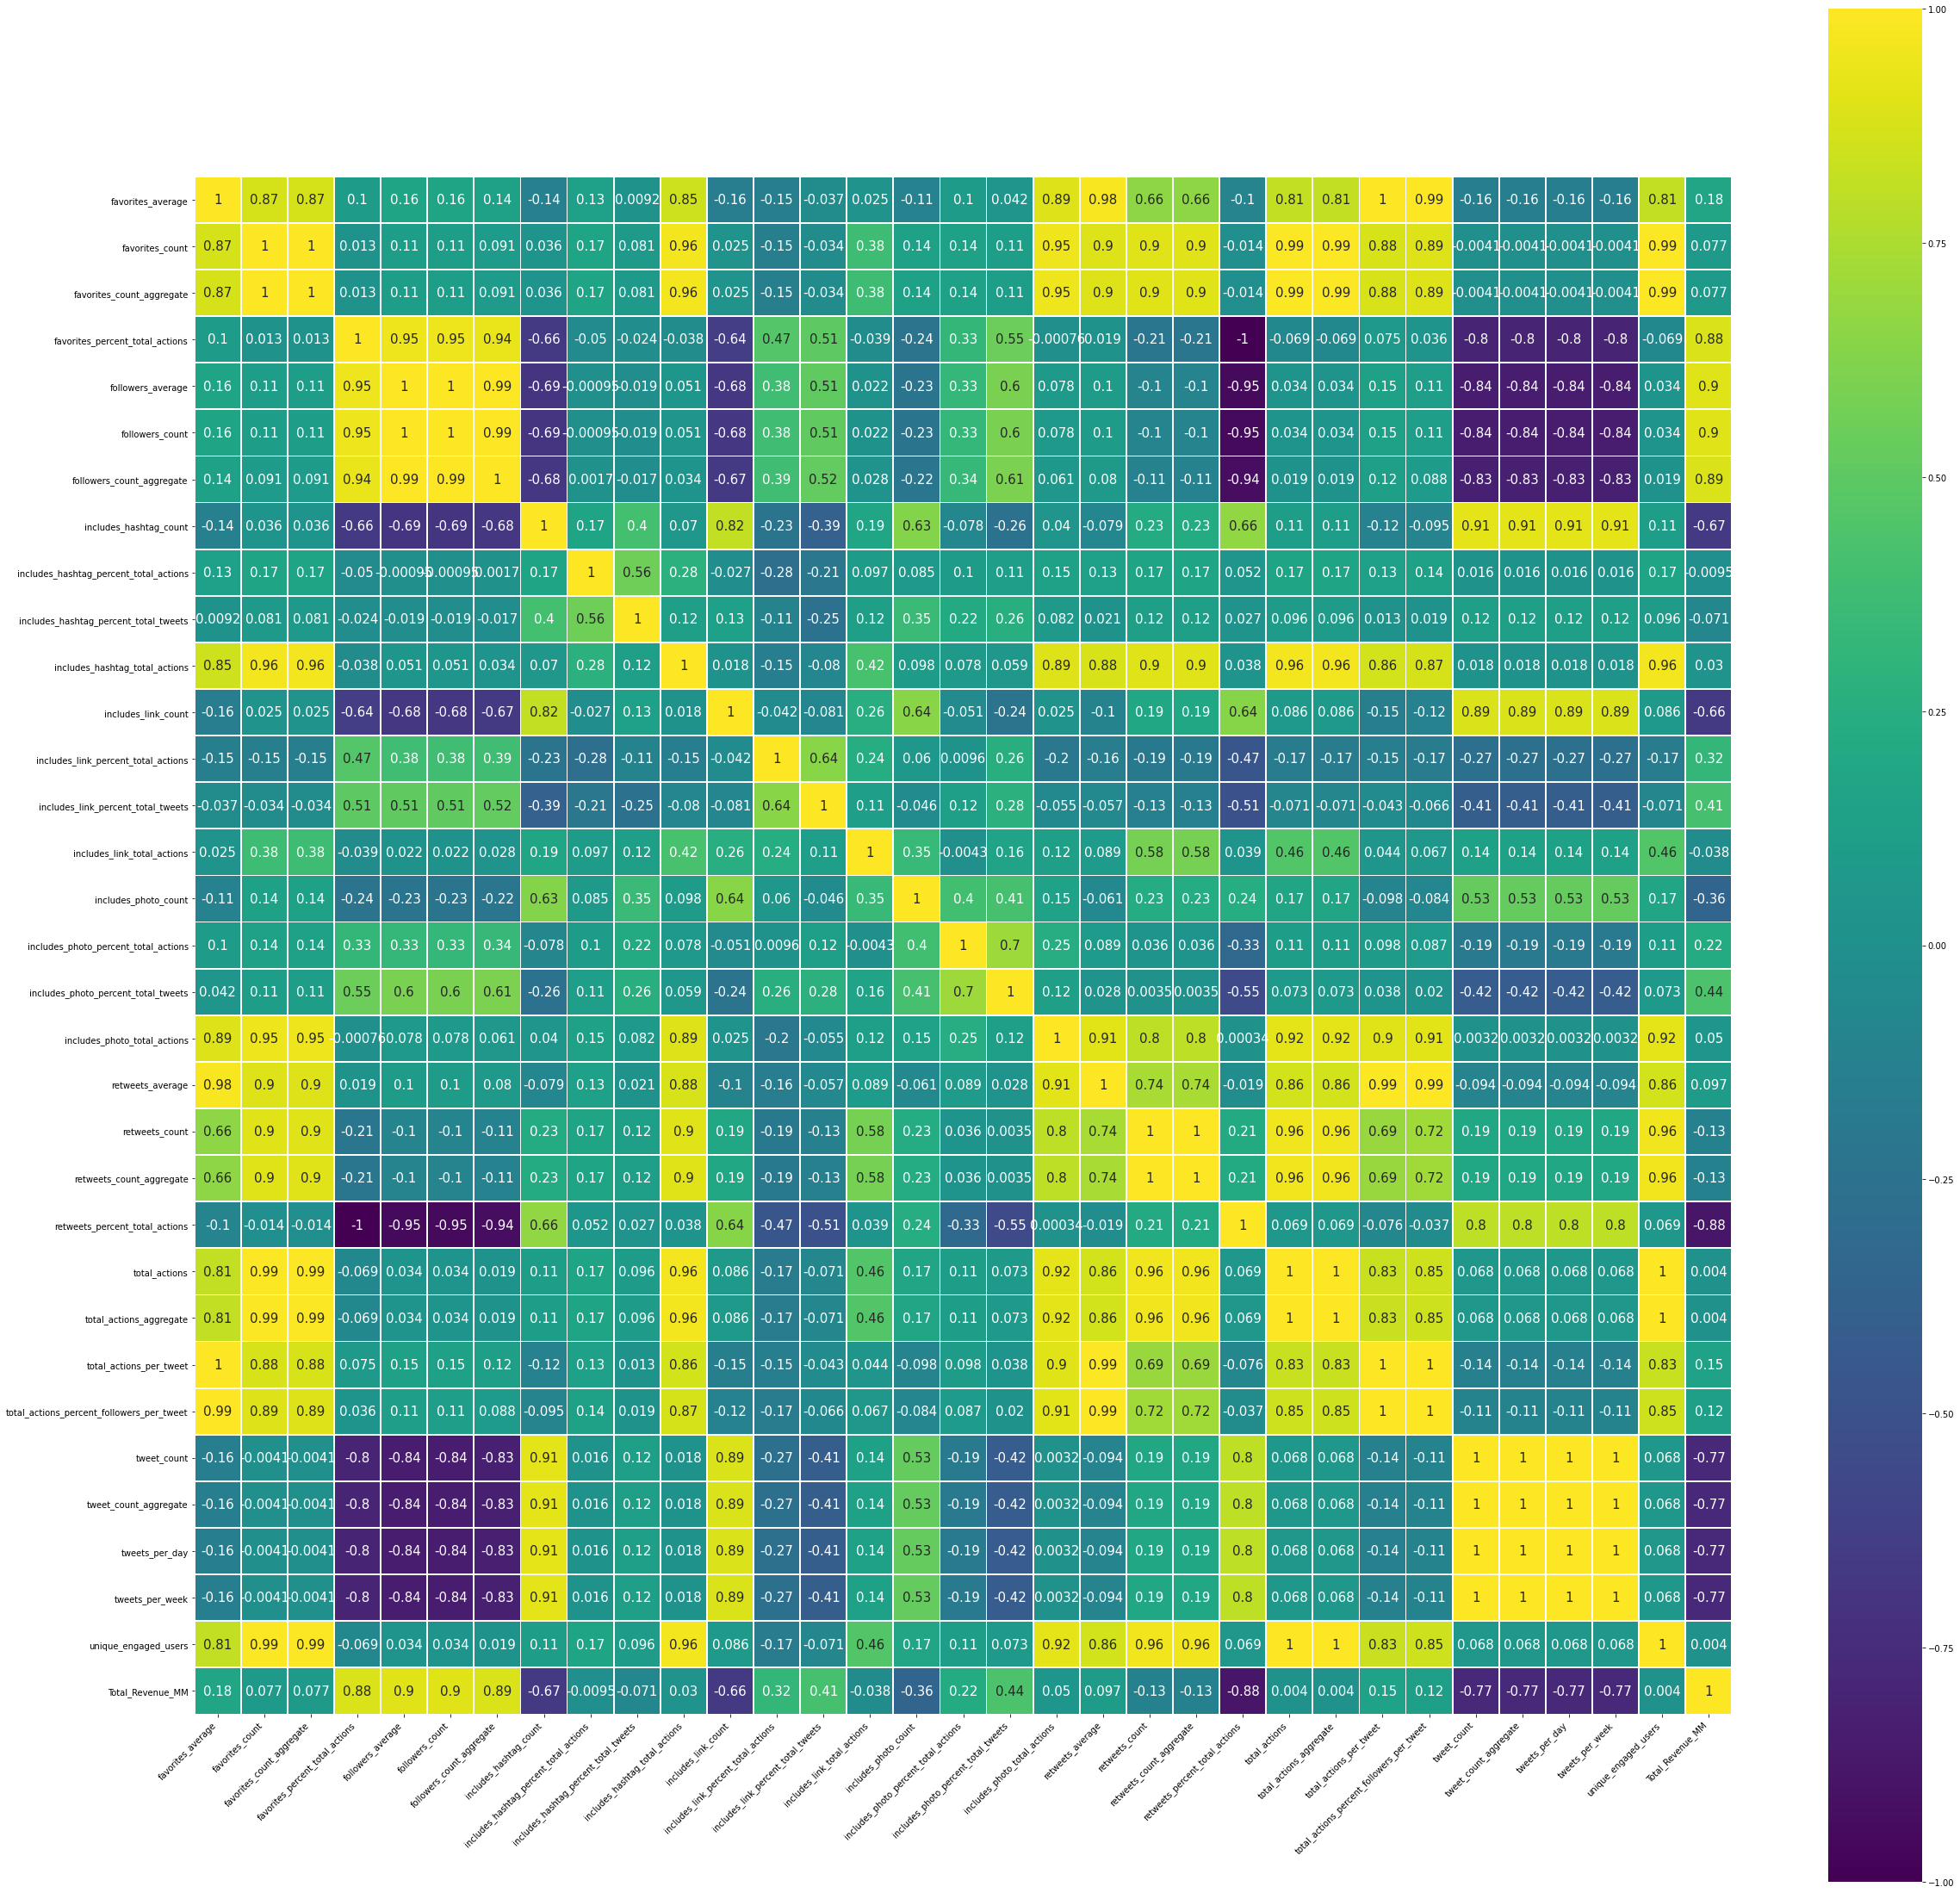

In [ ]:
f_twt, ax_twt = plt.subplots(figsize=(40, 40))
ax = sns.heatmap(
    nike_df1_twt.corr(), 
    vmin=-1, vmax=1,linewidths=0.8,center=0,cmap = 'viridis',
    annot = True, annot_kws={"size":15},
    square=True
)
ax_twt.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')

Checking which attributes Of Facebook are correlated

In [42]:
cor_mat = pd.DataFrame(nike_df1.corr()['Total_Revenue_MM'])
cor_mat['Columns'] = cor_mat.index
cor_mat.reset_index(inplace=True, drop=True)

cor_mat['Correlated?'] = np.nan
cor_mat.loc[(cor_mat['Total_Revenue_MM']>=0.4)|(cor_mat['Total_Revenue_MM']<=-0.4), 'Correlated?']='Yes'
cor_mat.fillna('No', inplace=True)
cor_mat

Total_Revenue_MM                                  Columns Correlated?
0          -0.052644                         comments_average          No
1          -0.182973                           comments_count          No
2          -0.183480                 comments_count_aggregate          No
3          -0.215512           comments_percent_total_actions          No
4           0.907562                              fan_average         Yes
5           0.907579                      fan_count_aggregate         Yes
6          -0.681494                            frequency_day         Yes
7          -0.681494                           frequency_week         Yes
8          -0.605927                  includes_question_count         Yes
9           0.036350  includes_question_percent_total_actions          No
10         -0.228259    includes_question_percent_total_posts          No
11         -0.078850          includes_question_total_actions          No
12          0.910543                              latest_fans         Yes
13          0.609557                        latest_page_score         Yes
14          0.201403                            likes_average          No
15         -0.240506                              likes_count          No
16         -0.241692                    likes_count_aggregate          No
17         -0.225446              likes_percent_total_actions          No
18         -0.448279                           photo_comments         Yes
19         -0.698352                              photo_count         Yes
20         -0.703455                    photo_count_aggregate         Yes
21         -0.273725                              photo_likes          No
22         -0.068100              photo_percent_total_actions          No
23         -0.384918                photo_percent_total_posts          No
24         -0.509539                             photo_shares         Yes
25         -0.681494                               post_count         Yes
26         -0.686920                     post_count_aggregate         Yes
27          0.247597                        reactions_average          No
28         -0.214849                          reactions_count          No
29         -0.216056                reactions_count_aggregate          No
30          0.336431          reactions_percent_total_actions          No
31         -0.041114                           shares_average          No
32         -0.068102                             shares_count          No
33         -0.068175                   shares_count_aggregate          No
34         -0.314645             shares_percent_total_actions          No
35         -0.171536                            total_actions          No
36         -0.171536                  total_actions_aggregate          No
37          0.182060                    total_actions_average          No
38         -0.329705      total_actions_percent_fans_per_post          No
39         -0.154140          total_modeled_impressions_count          No
40         -0.171536                     unique_engaged_users          No
41         -0.048145                           video_comments          No
42         -0.138129                              video_count          No
43         -0.141830                    video_count_aggregate          No
44         -0.070924                              video_likes          No
45          0.044792              video_percent_total_actions          No
46          0.365480                video_percent_total_posts          No
47         -0.036277                             video_shares          No
48          1.000000                         Total_Revenue_MM         Yes

Checking which attributes Of **Instagram** are correlated 

In [43]:
cor_mat_ig = pd.DataFrame(nike_df_ig1.corr()['Total_Revenue_MM'])
cor_mat_ig['Columns'] = cor_mat_ig.index
cor_mat_ig.reset_index(inplace=True, drop=True)

cor_mat_ig['Correlated?'] = np.nan
cor_mat_ig.loc[(cor_mat_ig['Total_Revenue_MM']>=0.4)|(cor_mat_ig['Total_Revenue_MM']<=-0.4), 'Correlated?']='Yes'
cor_mat_ig.fillna('No', inplace=True)
cor_mat_ig

Total_Revenue_MM                                    Columns Correlated?
0           0.080531                           comments_average          No
1          -0.006109                             comments_count          No
2          -0.006109                   comments_count_aggregate          No
3          -0.395720             comments_percent_total_actions          No
4           0.901228                           follower_average         Yes
5           0.901228                   follower_count_aggregate         Yes
6          -0.410498                                image_count         Yes
7          -0.410498                      image_count_aggregate         Yes
8          -0.532656                image_percent_total_actions         Yes
9          -0.657931                  image_percent_total_media         Yes
10          0.040833                        image_total_actions          No
11         -0.201496                     includes_hashtag_count          No
12         -0.035775     includes_hashtag_percent_total_actions          No
13         -0.037206       includes_hashtag_percent_total_media          No
14          0.161052             includes_hashtag_total_actions          No
15          0.362328                              likes_average          No
16          0.178588                                likes_count          No
17          0.178588                      likes_count_aggregate          No
18          0.395720                likes_percent_total_actions          No
19         -0.210636                                media_count          No
20         -0.210636                      media_count_aggregate          No
21          0.177413                              total_actions          No
22          0.177413                    total_actions_aggregate          No
23          0.361314                      total_actions_average          No
24         -0.674355  total_actions_percent_followers_per_media         Yes
25          1.000000                           Total_Revenue_MM         Yes

Checking which attributes Of YouTube are correlated



In [44]:
cor_mat_yt = pd.DataFrame(nike_df_yt1.corr()['Total_Revenue_MM'])
cor_mat_yt['Columns'] = cor_mat_yt.index
cor_mat_yt.reset_index(inplace=True, drop=True)

cor_mat_yt['Correlated?'] = np.nan
cor_mat_yt.loc[(cor_mat_yt['Total_Revenue_MM']>=0.4)|(cor_mat_yt['Total_Revenue_MM']<=-0.4), 'Correlated?']='Yes'
cor_mat_yt.fillna('No', inplace=True)
cor_mat_yt

Total_Revenue_MM           Columns Correlated?
0               1.0  Total_Revenue_MM         Yes

We see only one attribute here which is Total Revenue which means youtube does not really have a lot of impact on the Sales

Checking which attributes Of Twitter are correlated

In [45]:
cor_mat_twt = pd.DataFrame(nike_df_twt1.corr()['Total_Revenue_MM'])
cor_mat_twt['Columns'] = cor_mat_twt.index
cor_mat_twt.reset_index(inplace=True, drop=True)

cor_mat_twt['Correlated?'] = np.nan
cor_mat_twt.loc[(cor_mat_twt['Total_Revenue_MM']>=0.4)|(cor_mat_twt['Total_Revenue_MM']<=-0.4), 'Correlated?']='Yes'
cor_mat_twt.fillna('No', inplace=True)
cor_mat_twt

Total_Revenue_MM                                    Columns Correlated?
0           0.176712                          favorites_average          No
1           0.076700                            favorites_count          No
2           0.076700                  favorites_count_aggregate          No
3           0.884348            favorites_percent_total_actions         Yes
4           0.902225                          followers_average         Yes
5           0.902225                            followers_count         Yes
6           0.889849                  followers_count_aggregate         Yes
7          -0.665667                     includes_hashtag_count         Yes
8          -0.009540     includes_hashtag_percent_total_actions          No
9          -0.070946      includes_hashtag_percent_total_tweets          No
10          0.030346             includes_hashtag_total_actions          No
11         -0.662343                        includes_link_count         Yes
12          0.322144        includes_link_percent_total_actions          No
13          0.412474         includes_link_percent_total_tweets         Yes
14         -0.038434                includes_link_total_actions          No
15         -0.356850                       includes_photo_count          No
16          0.221389       includes_photo_percent_total_actions          No
17          0.435254        includes_photo_percent_total_tweets         Yes
18          0.050368               includes_photo_total_actions          No
19          0.097263                           retweets_average          No
20         -0.127486                             retweets_count          No
21         -0.127486                   retweets_count_aggregate          No
22         -0.884155             retweets_percent_total_actions         Yes
23          0.004025                              total_actions          No
24          0.004025                    total_actions_aggregate          No
25          0.153400                    total_actions_per_tweet          No
26          0.118914  total_actions_percent_followers_per_tweet          No
27         -0.768237                                tweet_count         Yes
28         -0.768237                      tweet_count_aggregate         Yes
29         -0.768237                             tweets_per_day         Yes
30         -0.768237                            tweets_per_week         Yes
31          0.004025                       unique_engaged_users          No
32          1.000000                           Total_Revenue_MM         Yes

Performing Spearman Correlation test for signifance measure based on P-val

In [46]:
def spearman_test(df):
    rho_llist = []
    pval_list= []
    for i in range(df.shape[1]):
#         print(df[i])
        t = stats.spearmanr(df.iloc[:,i],df['Total_Revenue_MM'])
        rho_llist.append(t[0])
        pval_list.append(t[1])
    return rho_llist, pval_list

In [47]:
spearman_test_list_fb = spearman_test(nike_df1)[1]
spearman_test_list_ig = spearman_test(nike_df_ig1)[1]
spearman_test_list_yt = spearman_test(nike_df_yt1)[1]
spearman_test_list_twt = spearman_test(nike_df_twt1)[1]

In [ ]:
print(spearman_test_list_fb)
print(spearman_test_list_ig)
print(spearman_test_list_yt)
print(spearman_test_list_twt)

Filling the NA values 

In [48]:
spearman_df_fb = pd.DataFrame({'Columns':nike_df1.columns,'Pval':spearman_test_list_fb})
spearman_df_fb['Significance'] = np.nan
spearman_df_fb.loc[spearman_df_fb['Pval'] <= 0.05, 'Significance'] = 'Yes'
spearman_df_fb['Significance'].fillna('No', inplace = True)

spearman_df_ig = pd.DataFrame({'Columns':nike_df_ig1.columns,'Pval':spearman_test_list_ig})
spearman_df_ig['Significance'] = np.nan
spearman_df_ig.loc[spearman_df_ig['Pval'] <= 0.05, 'Significance'] = 'Yes'
spearman_df_ig['Significance'].fillna('No', inplace = True)

spearman_df_yt = pd.DataFrame({'Columns':nike_df_yt1.columns,'Pval':spearman_test_list_yt})
spearman_df_yt['Significance'] = np.nan
spearman_df_yt.loc[spearman_df_yt['Pval'] <= 0.05, 'Significance'] = 'Yes'
spearman_df_yt['Significance'].fillna('No', inplace = True)

spearman_df_twt = pd.DataFrame({'Columns':nike_df_twt1.columns,'Pval':spearman_test_list_twt})
spearman_df_twt['Significance'] = np.nan
spearman_df_twt.loc[spearman_df_twt['Pval'] <= 0.05, 'Significance'] = 'Yes'
spearman_df_twt['Significance'].fillna('No', inplace = True)

In [ ]:
spearman_df

In [ ]:
spearman_df_ig

In [ ]:
spearman_df_twt

All of the above dataframes have Total Revenue as one of the rows, we will pop it to understand the correlation the attributes w.r.t Total Revenue

In [61]:
cor_list = cor_mat.loc[cor_mat['Correlated?']=='Yes', 'Columns'].to_list()
# Uncomment when running for the first time
cor_list.pop(-1)

'Total_Revenue_MM'

In [62]:
cor_list

['fan_average',
 'fan_count_aggregate',
 'frequency_day',
 'frequency_week',
 'includes_question_count',
 'latest_fans',
 'latest_page_score',
 'photo_comments',
 'photo_count',
 'photo_count_aggregate',
 'photo_shares',
 'post_count',
 'post_count_aggregate']

In [63]:
nike_df1[cor_list].isna().sum()

fan_average                  0
fan_count_aggregate          0
frequency_day                0
frequency_week               0
includes_question_count    291
latest_fans                  0
latest_page_score            0
photo_comments               0
photo_count                  0
photo_count_aggregate        0
photo_shares                 1
post_count                   0
post_count_aggregate         0
dtype: int64

In [67]:
nike_df1.dropna(inplace=True)

n_fb = nike_df1[cor_list]

In [55]:
cor_list_ig = cor_mat_ig.loc[cor_mat_ig['Correlated?']=='Yes', 'Columns'].to_list()
cor_list_ig.pop(-1)
cor_list_ig

['follower_average',
 'follower_count_aggregate',
 'image_count',
 'image_count_aggregate',
 'image_percent_total_actions',
 'image_percent_total_media',
 'total_actions_percent_followers_per_media']

In [57]:
cor_list_twt = cor_mat_twt.loc[cor_mat_twt['Correlated?']=='Yes', 'Columns'].to_list()
cor_list_twt.pop(-1)
cor_list_twt

['favorites_percent_total_actions',
 'followers_average',
 'followers_count',
 'followers_count_aggregate',
 'includes_hashtag_count',
 'includes_link_count',
 'includes_link_percent_total_tweets',
 'includes_photo_percent_total_tweets',
 'retweets_percent_total_actions',
 'tweet_count',
 'tweet_count_aggregate',
 'tweets_per_day',
 'tweets_per_week']

We saw some Null values. Let us remove them for Instagram and Twitter as well. Youtube does not have any significant attributes left, hence we won't be working Youtube's dataframe

In [58]:
nike_df_ig1[cor_list_ig].isna().sum()
nike_df_ig1.dropna(inplace=True)
n_ig = nike_df_ig1[cor_list_ig]


nike_df_twt1[cor_list_twt].isna().sum()
nike_df_twt1.dropna(inplace=True)
n_twt = nike_df_twt1[cor_list_twt]

In [ ]:
n_ig

**OLS REGRESSION TEST FOR FACEBOOK**

In [65]:
X = nike_df1[cor_list]
y = nike_df1['Total_Revenue_MM']

# Fit and summarize OLS model
mod = sm.OLS(y,X)
res = mod.fit()

print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:       Total_Revenue_MM   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          4.001e+04
Date:                Fri, 09 Apr 2021   Prob (F-statistic):                        0.00
Time:                        19:42:49   Log-Likelihood:                         -12991.
No. Observations:                1696   AIC:                                  2.600e+04
Df Residuals:                    1685   BIC:                                  2.606e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [87]:
X_ig = nike_df_ig1[cor_list_ig]
y_ig = nike_df_ig1['Total_Revenue_MM']

# Fit and summarize OLS model
mod_ig = sm.OLS(y_ig,X_ig)
res_ig = mod_ig.fit()
print(res_ig.summary())

                                 OLS Regression Results                                
Dep. Variable:       Total_Revenue_MM   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                          2.374e+04
Date:                Fri, 09 Apr 2021   Prob (F-statistic):                        0.00
Time:                        19:54:10   Log-Likelihood:                         -17957.
No. Observations:                2129   AIC:                                  3.592e+04
Df Residuals:                    2124   BIC:                                  3.595e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------

In [86]:
X_twt = nike_df_twt1[cor_list_twt]
y_twt = nike_df_twt1['Total_Revenue_MM']
# print(y_ig)
# Fit and summarize OLS model
mod_twt = sm.OLS(y_twt,X_twt)
res_twt = mod_twt.fit()
print(res_twt.summary())

                            OLS Regression Results                            
Dep. Variable:       Total_Revenue_MM   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     1425.
Date:                Fri, 09 Apr 2021   Prob (F-statistic):               0.00
Time:                        19:54:00   Log-Likelihood:                -15635.
No. Observations:                2121   AIC:                         3.129e+04
Df Residuals:                    2112   BIC:                         3.134e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
fa

After performing OLS Regression Test for Facebook,Instagram and Twitter, it is not clear that how much of Facebook sales is contributing to the overall sales. Hence due to data constraints, I decided to combine all of the most significant and correlated attributes for all social media platforms and then run OLS Regression Test on them.

In [68]:
m1 = pd.merge(n_fb, n_ig, how='inner', left_index=True, right_index=True)
m2 = pd.merge(m1, n_twt, how='inner', left_index=True, right_index=True)

In [69]:
m2.columns

Index(['fan_average', 'fan_count_aggregate', 'frequency_day', 'frequency_week',
       'includes_question_count', 'latest_fans', 'latest_page_score',
       'photo_comments', 'photo_count', 'photo_count_aggregate',
       'photo_shares', 'post_count', 'post_count_aggregate',
       'follower_average', 'follower_count_aggregate', 'image_count',
       'image_count_aggregate', 'image_percent_total_actions',
       'image_percent_total_media',
       'total_actions_percent_followers_per_media',
       'favorites_percent_total_actions', 'followers_average',
       'followers_count', 'followers_count_aggregate',
       'includes_hashtag_count', 'includes_link_count',
       'includes_link_percent_total_tweets',
       'includes_photo_percent_total_tweets', 'retweets_percent_total_actions',
       'tweet_count', 'tweet_count_aggregate', 'tweets_per_day',
       'tweets_per_week'],
      dtype='object')

In [70]:
m2['date']=m2.index
m2

fan_average  fan_count_aggregate  ...  tweets_per_week       date
date                                           ...                            
2013-01-01  6.480554e+05          102392756.0  ...        10.769231 2013-01-01
2013-01-04  6.493485e+05          102597070.0  ...        12.061538 2013-01-04
2013-01-07  6.507484e+05          102818253.0  ...        12.384615 2013-01-07
2013-01-08  6.511294e+05          102878441.0  ...        11.630769 2013-01-08
2013-01-09  6.515804e+05          102949698.0  ...        10.123077 2013-01-09
2013-01-10  6.521750e+05          103043643.0  ...        11.630769 2013-01-10
2013-01-11  6.526530e+05          103119172.0  ...        10.123077 2013-01-11
2013-01-13  6.536304e+05          103273597.0  ...         6.030769 2013-01-13
2013-01-14  6.541100e+05          103349380.0  ...         9.800000 2013-01-14
2013-01-15  6.545450e+05          103418111.0  ...        11.307692 2013-01-15
2013-01-16  6.549909e+05          103488564.0  ...        10.338462 2013-01-16
2013-01-17  6.555742e+05          103580725.0  ...        16.907692 2013-01-17
2013-01-18  6.561013e+05          103663998.0  ...        15.076923 2013-01-18
2013-01-19  6.569217e+05          103793630.0  ...         9.907692 2013-01-19
2013-01-21  6.581804e+05          103992505.0  ...        11.846154 2013-01-21
2013-01-22  6.591900e+05          104152015.0  ...        18.523077 2013-01-22
2013-01-23  6.598883e+05          104262348.0  ...        17.446154 2013-01-23
2013-01-24  6.605584e+05          104368235.0  ...        16.261538 2013-01-24
2013-01-25  6.611945e+05          104468724.0  ...        14.000000 2013-01-25
2013-01-27  6.626681e+05          104701563.0  ...         9.046154 2013-01-27
2013-01-28  6.634659e+05          104827618.0  ...        13.569231 2013-01-28
2013-01-29  6.641810e+05          104940594.0  ...        16.476923 2013-01-29
2013-01-30  6.648089e+05          105039812.0  ...        16.476923 2013-01-30
2013-01-31  6.654678e+05          105143908.0  ...        15.400000 2013-01-31
2013-02-01  6.663891e+05          105289485.0  ...        13.138462 2013-02-01
2013-02-02  6.668794e+05          105366947.0  ...        10.123077 2013-02-02
2013-02-03  6.842698e+05          108114626.0  ...        10.769231 2013-02-03
2013-02-04  6.866563e+05          108491699.0  ...        10.446154 2013-02-04
2013-02-05  6.871954e+05          108576870.0  ...        12.923077 2013-02-05
2013-02-06  6.877887e+05          108670615.0  ...        12.169231 2013-02-06
2013-02-07  6.888564e+05          108839317.0  ...        12.707692 2013-02-07
2013-02-08  6.896812e+05          108969635.0  ...        11.092308 2013-02-08
2013-02-11  6.913999e+05          109241191.0  ...        11.200000 2013-02-11
2013-02-12  6.918742e+05          109316131.0  ...        11.307692 2013-02-12
2013-02-13  6.928222e+05          109465910.0  ...        14.969231 2013-02-13
2013-02-14  6.933838e+05          109554640.0  ...        19.276923 2013-02-14
2013-02-15  6.955272e+05          109893300.0  ...        17.553846 2013-02-15
2013-02-16  6.960691e+05          109978917.0  ...        11.953846 2013-02-16
2013-02-17  6.969975e+05          110125606.0  ...        10.230769 2013-02-17
2013-02-18  6.978513e+05          110260502.0  ...         9.692308 2013-02-18
2013-02-19  6.984415e+05          110353752.0  ...        13.138462 2013-02-19
2013-02-20  6.992584e+05          110482823.0  ...        12.815385 2013-02-20
2013-02-21  6.998153e+05          110570820.0  ...        13.138462 2013-02-21
2013-02-22  7.006093e+05          110696272.0  ...        11.738462 2013-02-22
2013-02-23  7.011860e+05          110787394.0  ...        11.630769 2013-02-23
2013-02-24  7.020720e+05          110927379.0  ...         5.169231 2013-02-24
2013-02-26  7.034967e+05          111152486.0  ...        10.230769 2013-02-26
2013-02-27  7.041516e+05          111255950.0  ...         9.153846 2013-02-27
2013-02-28  7.047077e+05          111343824.0  ...         8.07

In [71]:
m2["Quarter"] = m2['date'].apply(lambda x: get_quart(x))

In [72]:
nike_model_df = pd.merge(m2, df_sales, how='inner', left_on='Quarter', right_on='Quarter')

In [73]:
nike_model_df['Total_Revenue_MM']= nike_model_df['Total_Revenue_MM'].str.replace(',','')
nike_model_df['Total_Revenue_MM'] = nike_model_df['Total_Revenue_MM'].astype('float')

In [75]:
nike_model_df.columns

Index(['fan_average', 'fan_count_aggregate', 'frequency_day', 'frequency_week',
       'includes_question_count', 'latest_fans', 'latest_page_score',
       'photo_comments', 'photo_count', 'photo_count_aggregate',
       'photo_shares', 'post_count', 'post_count_aggregate',
       'follower_average', 'follower_count_aggregate', 'image_count',
       'image_count_aggregate', 'image_percent_total_actions',
       'image_percent_total_media',
       'total_actions_percent_followers_per_media',
       'favorites_percent_total_actions', 'followers_average',
       'followers_count', 'followers_count_aggregate',
       'includes_hashtag_count', 'includes_link_count',
       'includes_link_percent_total_tweets',
       'includes_photo_percent_total_tweets', 'retweets_percent_total_actions',
       'tweet_count', 'tweet_count_aggregate', 'tweets_per_day',
       'tweets_per_week', 'date', 'Quarter', 'Total_Revenue_MM'],
      dtype='object')

In [78]:
features=['fan_average', 'fan_count_aggregate', 'frequency_day', 'frequency_week',
       'includes_question_count', 'latest_fans', 'latest_page_score',
       'photo_comments', 'photo_count', 'photo_count_aggregate',
       'photo_shares', 'post_count', 'post_count_aggregate',
       'follower_average', 'follower_count_aggregate', 'image_count',
       'image_count_aggregate', 'image_percent_total_actions',
       'image_percent_total_media',
       'total_actions_percent_followers_per_media',
       'favorites_percent_total_actions', 'followers_average',
       'followers_count', 'followers_count_aggregate',
       'includes_hashtag_count', 'includes_link_count',
       'includes_link_percent_total_tweets',
       'includes_photo_percent_total_tweets', 'retweets_percent_total_actions',
       'tweet_count', 'tweet_count_aggregate', 'tweets_per_day',
       'tweets_per_week']

# RESULTS AND EVALUATION

OLS REGRESSION TEST ON THE ABOVE FEATURES

In [79]:
X_final = nike_model_df[features]
y_final = nike_model_df['Total_Revenue_MM']

# Fit and summarize OLS model
mod_final = sm.OLS(y_final,X_final)
res_final = mod_final.fit()
print(res_final.summary())

                            OLS Regression Results                            
Dep. Variable:       Total_Revenue_MM   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     450.7
Date:                Fri, 09 Apr 2021   Prob (F-statistic):               0.00
Time:                        19:51:30   Log-Likelihood:                -11879.
No. Observations:                1637   AIC:                         2.381e+04
Df Residuals:                    1612   BIC:                         2.394e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------